In [47]:
#### importing necessary libraries

In [262]:
import pandas as pd
import os




In [46]:
#### Merging all csv files into a single one

In [261]:
#df = pd.read_csv("./Sales_data/01 Jan 2018 Travel Plaza.csv")
#df.head()
#path = "./Sales_data"
#open = os.listdir(path)
#for file in open:
 #   print(file)
    
files = [file for file in os.listdir("./Sales_data")]
path = "./SALES_data"
#for file in files:
#    print (file)

all_months = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_data/"+file)
    all_months = pd.concat([all_months,df])

all_months.to_csv("all_data.csv", index=False)

In [258]:
print (os.getcwd())

C:\Users\ThinkPad1\Desktop\Python folder


In [272]:
try:
    fd = "./names/names.txt"
    file = open (fd, 'r')
    text = file.read()
    print (text)
except TypeError:
    print('Problem loading file: '+ file)
    print (os.getcwd())

# Augment data with additional column

# Read in uploaded dataframe

In [264]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,<Date>,<Description>,<Deposit Amount>
0,2/1/2018,MERCHANT BANKCD/DEPOSIT 497210508881,0.93
1,5/2/2018,PM USA INC/EDI PAYMNT,1.00
2,3/29/2018,PM USA INC/EDI PAYMNT,1.50
3,3/12/2018,PM USA INC/EDI PAYMNT,1.50
4,7/31/2018,PM USA INC/EDI PAYMNT,1.50


### Clean up data

### drop rows of NaN

In [265]:
nan_df = all_data[all_data.isna().any(axis=1)] #findin all NaN data in dataframe
nan_df.head() #printing all the NaN datas from dataframe

all_data = all_data.dropna(how= 'all')
all_data.head()


,<Date>,<Description>,<Deposit Amount>
0,2/1/2018,MERCHANT BANKCD/DEPOSIT 497210508881,0.93
1,5/2/2018,PM USA INC/EDI PAYMNT,1.00
2,3/29/2018,PM USA INC/EDI PAYMNT,1.50
3,3/12/2018,PM USA INC/EDI PAYMNT,1.50
4,7/31/2018,PM USA INC/EDI PAYMNT,1.50


### Find value errors (ex: here, 1/3/2018) and delete it

In [266]:
all_data = all_data[all_data['<Date>'].str[0:1] != 'Or']
all_data.head()

,<Date>,<Description>,<Deposit Amount>
0,2/1/2018,MERCHANT BANKCD/DEPOSIT 497210508881,0.93
1,5/2/2018,PM USA INC/EDI PAYMNT,1.00
2,3/29/2018,PM USA INC/EDI PAYMNT,1.50
3,3/12/2018,PM USA INC/EDI PAYMNT,1.50
4,7/31/2018,PM USA INC/EDI PAYMNT,1.50


# Augment data with additional column

### Task 2: Adding month column

In [267]:
all_data ['month'] = all_data['<Date>'].str[0:1]  #extracting the first character from <Date> header into new month header
all_data['month'] = all_data['month'].astype('int32') #converting the type of 'month' from string to integer
all_data.head(20)

,<Date>,<Description>,<Deposit Amount>,month
0,2/1/2018,MERCHANT BANKCD/DEPOSIT 497210508881,0.93,2
1,5/2/2018,PM USA INC/EDI PAYMNT,1.00,5
2,3/29/2018,PM USA INC/EDI PAYMNT,1.50,3
3,3/12/2018,PM USA INC/EDI PAYMNT,1.50,3
4,7/31/2018,PM USA INC/EDI PAYMNT,1.50,7
5,4/2/2018,MERCHANT BANKCD/DEPOSIT 497210508881,1.62,4
6,2/1/2018,USSMOKLESS COMP1/EDI PAYMNT,1.75,2
7,5/4/2018,USSMOKLESS COMP1/EDI PAYMNT,1.75,5
8,5/8/2018,U-HAUL INT'L/DLR PYMNTS 54396 SUPER S,1.86,5
9,3/2/2018,MERCHANT BANKCD/DEPOSIT 497210508881,1.91,3


In [268]:
all_data['month'] = pd.to_numeric(all_data['month'])
all_data['month'] = all_data['month']
#all_data ['slicing'] = all_data.loc[:,['<Date>','<Description>']]
#name = all_data.loc[:, ['<Date>', '<Description>']]
#print (name)
all_data.head()


,<Date>,<Description>,<Deposit Amount>,month
0,2/1/2018,MERCHANT BANKCD/DEPOSIT 497210508881,0.93,2
1,5/2/2018,PM USA INC/EDI PAYMNT,1.00,5
2,3/29/2018,PM USA INC/EDI PAYMNT,1.50,3
3,3/12/2018,PM USA INC/EDI PAYMNT,1.50,3
4,7/31/2018,PM USA INC/EDI PAYMNT,1.50,7


### What was the best month for deposit

In [269]:
all_data.groupby('month').sum()

,<Deposit Amount>
month,
1,519519.19
2,192258.49
3,254135.11
4,239030.58
5,239293.32
6,268699.14
7,262807.81
8,256999.10
9,236158.90


### Using Graph to demonstrate the data


In [270]:
results = all_data.groupby('month').sum()

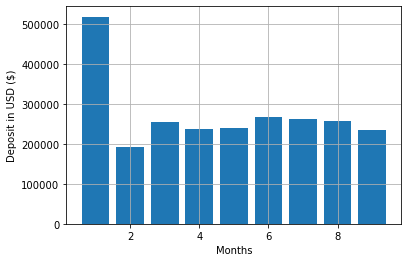

In [271]:
import matplotlib.pyplot as plt  # importing pyplot module from matplotlib package 
months = range(1,10)
plt.bar(months, results['<Deposit Amount>'])
plt.ylabel ('Deposit in USD ($)')
plt.xlabel ('Months')
plt.grid(True)
plt.show()